<a href="https://colab.research.google.com/github/panfiloow/fake-news-detection/blob/main/fake_news_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and importing libraries

In [3]:
!pip install pandas scikit-learn matplotlib seaborn

In [8]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [9]:
!wget https://github.com/panfiloow/fake-news-detection/raw/main/fake_news.rar

--2024-10-21 01:25:07--  https://github.com/panfiloow/fake-news-detection/raw/main/fake_news.rar
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/panfiloow/fake-news-detection/main/fake_news.rar [following]
--2024-10-21 01:25:07--  https://raw.githubusercontent.com/panfiloow/fake-news-detection/main/fake_news.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9178223 (8.8M) [application/octet-stream]
Saving to: ‘fake_news.rar’

fake_news.rar       100%[===================>]   8.75M  --.-KB/s    in 0.1s    

2024-10-21 01:25:08 (65.2 MB/s) - ‘fake_news.rar’ saved [9178223/9178223]



In [10]:
!unrar x fake_news.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from fake_news.rar

Extracting  fake_news.csv                                                  0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%100%  OK 
A

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud
from sklearn.metrics import roc_curve, auc

# Data loading

In [11]:
df = pd.read_csv('/content/fake_news.csv')

In [12]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


# Model training

In [86]:
X = df['text']
y = df['label']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [88]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [89]:
classifier = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=42)

# Visualization and evaluation of the model

In [91]:
y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.66%


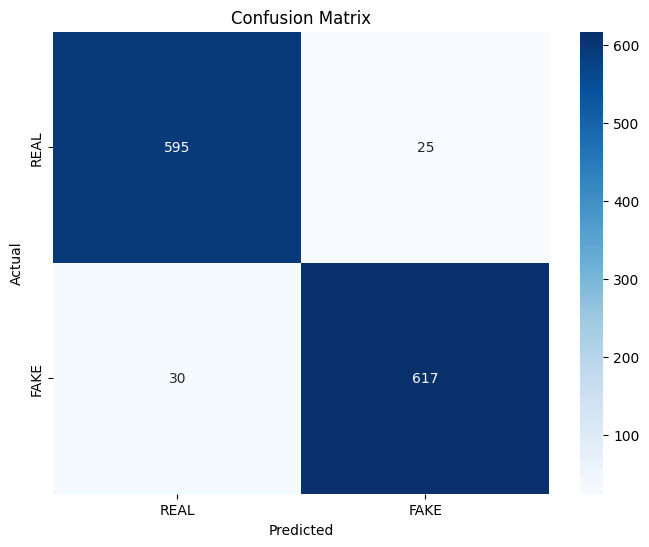

In [92]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

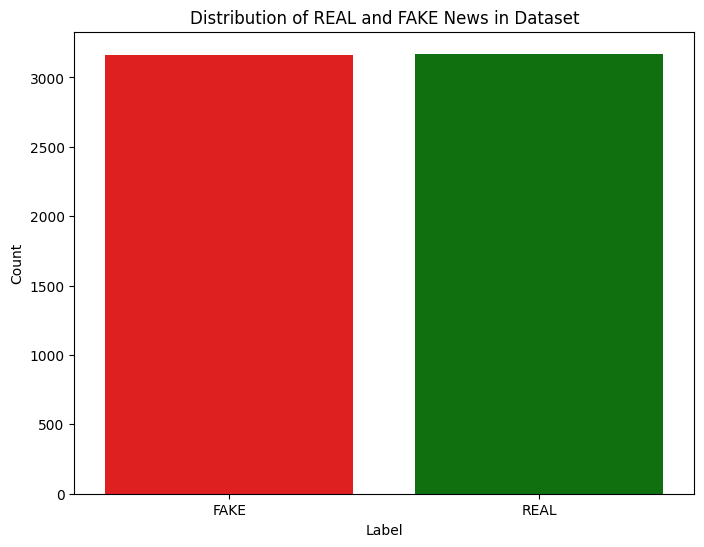

In [93]:
palette = {'REAL': 'green', 'FAKE': 'red'}
plt.figure(figsize=(8, 6))
sns.countplot(x='label', hue='label', data=df, palette=palette)
plt.title('Distribution of REAL and FAKE News in Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

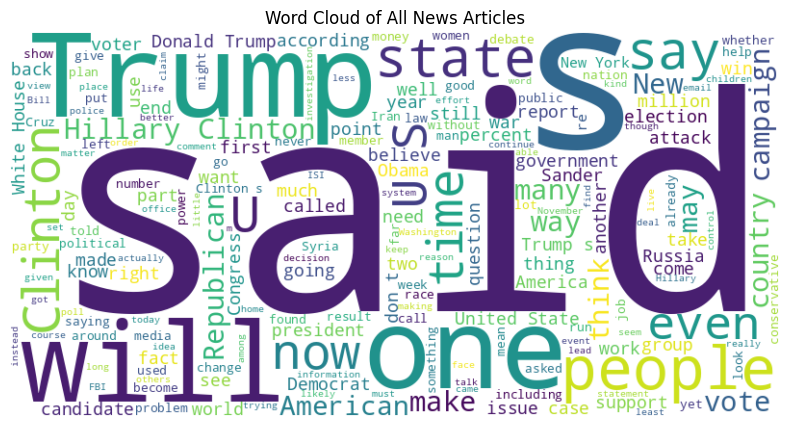

In [94]:
all_text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All News Articles')
plt.show()


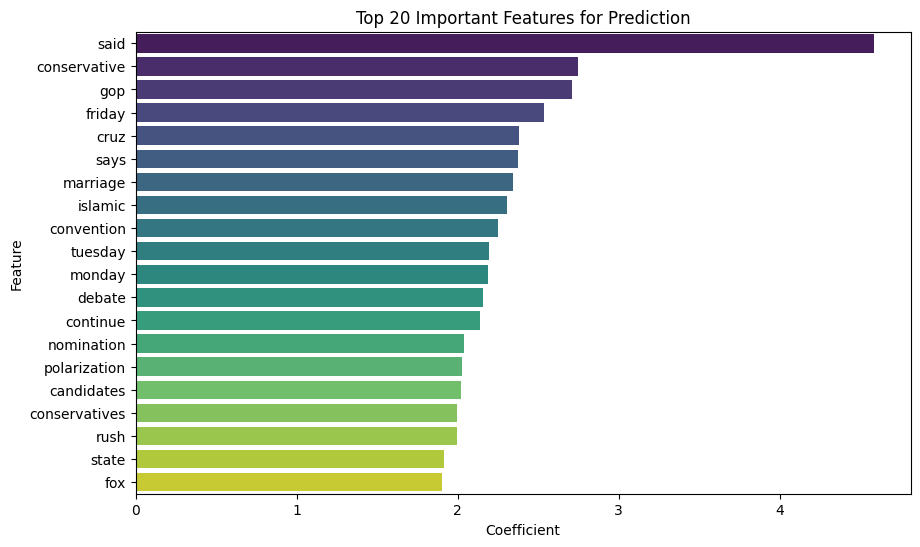

In [95]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coef = classifier.coef_[0]

importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
importance = importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', hue='Feature', data=importance.head(20), palette='viridis')
plt.title('Top 20 Important Features for Prediction')
plt.show()


In [96]:
incorrect_indices = np.where(y_pred != y_test)[0]

print("Incorrect Predictions:\n" + "="*30)

for i in incorrect_indices[:5]:
    print(f"Text: {X_test.iloc[i]}\nPredicted: {y_pred[i]}\nActual: {y_test.iloc[i]}\n" + "-"*30)

Incorrect Predictions:
Text: Yahoo News 
A 38-year-old Oklahoma man who has evaded police for two days after killing two people and shooting four others — including two police officers — has a hit list and may intend to kill up to eight more people, authorities said Tuesday. 
“This is a man who has indicated a total propensity to kill people, to injure people, shoot people,” said Oklahoma County Sheriff John Whetsel. “He has no care for human life whatsoever.” 
Authorities believe he may be headed to Nevada and have notified police there to be on the lookout. Oklahoma County Sheriff John Whetsel told ABC News that the suspect, Michael Vance, could face the death penalty if convicted of the crimes. Whetsel is warning citizens to stay clear if they spot Vance, adding that he has “absolutely nothing to lose.” Vance’s rampage began Sunday evening, when he allegedly shot two police officers responding to the scene at a mobile home park over reports of shots fired in the area. The two office

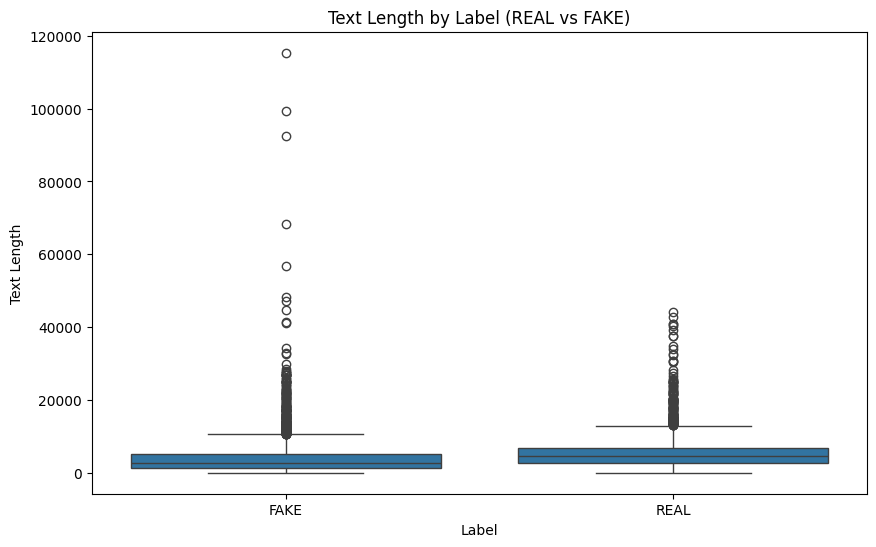

In [97]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length by Label (REAL vs FAKE)')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

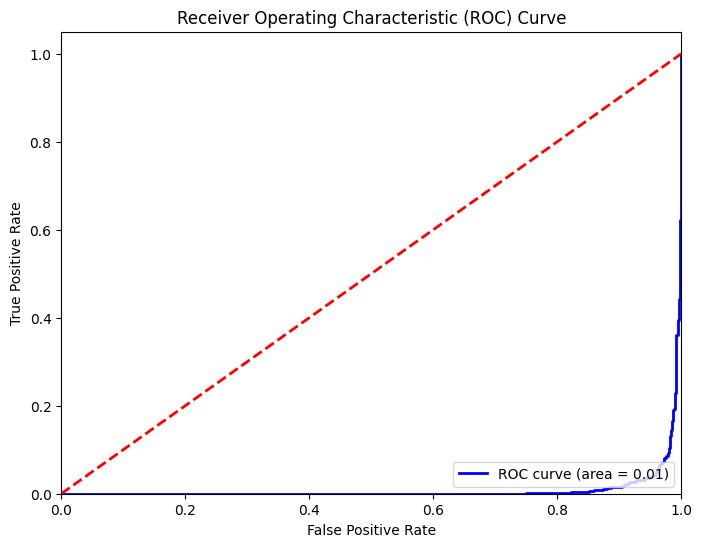

In [98]:
y_scores = classifier.decision_function(X_test_tfidf)

fpr, tpr, _ = roc_curve(y_test.map({'REAL': 0, 'FAKE': 1}), y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
